<a href="https://colab.research.google.com/github/suadamohammed/coco/blob/main/cocoa_leaves_classification_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import numpy as np
import os


X = []
y = []

base_path='/content/drive/MyDrive/ICAR_Coco'
source_path=base_path

for child in os.listdir(source_path):
    count_child=0
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            count_child+=1
            X_i = Image.open(os.path.join(sub_path, data_file))
            X_i = np.array(X_i.resize((120,120))) / 255.0
            X.append(X_i)
            y.append(child)
        print(f"{child},no of files,{count_child}")
print(np.shape(X))
print(y)

Healthy,no of files,28
MnDef,no of files,99
(127, 120, 120, 3)
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef', 'MnDef'

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Assuming you have X and y defined somewhere before this code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y),
                                                    test_size=0.2, random_state=42)

# Define the CNN model
cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape=(120, 120, 3)))
cnnModel.add(layers.MaxPooling2D((2, 2)))

cnnModel.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnnModel.add(layers.MaxPooling2D((2, 2)))

cnnModel.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnnModel.add(layers.Flatten())

cnnModel.add(layers.Dense(64, activation="relu"))
cnnModel.add(layers.Dense(32, activation="relu"))
cnnModel.add(layers.Dense(1, activation="sigmoid"))

cnnModel.summary()

# Compile the model
cnnModel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
cnnModel.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model on the test set
testLoss, testAccuracy = cnnModel.evaluate(X_test, y_test)
print("Test Accuracy:", testAccuracy)

# Save the model weights
cnnModel.save_weights('./my_checkpoint')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        5824      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 43264)             0

In [ ]:
y_pred = (cnnModel.predict(X_test) > 0.5).astype("int32")
print(y_pred)

1/1 [==============================] - 0s 199ms/step
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]


<Axes: >

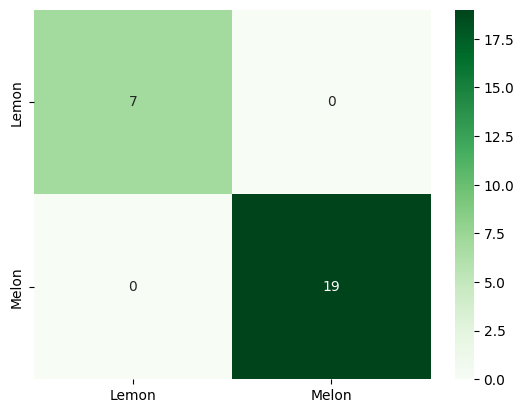

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='Greens', annot=True, xticklabels = ["Lemon", "Melon"],yticklabels = ["Lemon", "Melon"])


1/1 [==============================] - 0s 197ms/step


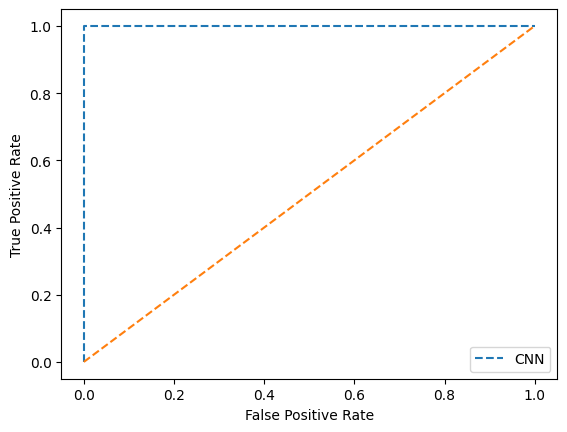

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

pred_prob = cnnModel.predict(X_test)
pr1, tpr1, thresh1 = roc_curve(y_test, pred_prob, pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(pr1, tpr1, linestyle='--', label='CNN')
plt.plot(p_fpr, p_tpr, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/